# 1. Introduction


## 🪐 Meteorite Landings on Earth: A Data Science Approach

Meteorites are natural objects from space that survive their passage through the atmosphere and land on Earth. Studying them provides insights into the formation and composition of the solar system.

This project explores NASA’s meteorite landing dataset to investigate:

- How meteorite classifications vary between discovered finds and observed falls
- Whether mass correlates with classification or geography
- If meteorite falls cluster in specific geographic regions
- Whether we can predict if a meteorite was ‘Fell’ or ‘Found’ based on its physical and spatial attributes

We follow the full data science lifecycle: from data cleaning, exploration, visualization, modeling, and interpretation to answer these questions. Lastly, we propose insights that may improve meteorite recovery strategies.


# 2. Importing Required Libraries

We begin by importing essential Python libraries for data manipulation, visualization, and modeling.

- `pandas`, `numpy`: Data handling
- `matplotlib`, `seaborn`, `plotly`: Data visualization

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 3. Dataset Overview



We now load the NASA Meteorite Landings dataset and begin exploring its contents. This dataset contains detailed information about meteorite events, including:

- Physical properties (mass, classification)
- Temporal and spatial information (year, latitude, longitude)
- Discovery status (whether it was ‘Fell’ or ‘Found’)


In [158]:
df = pd.read_csv('Meteorite_Landings.csv')
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,Unnamed: 10
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",NaN


## Dataset Summary

We inspect the dataset for:
- Number of entries and missing values
- Data types of each column
- Basic statistical measures (mean, std, min, max)

This helps us assess the quality of the data and decide on necessary cleaning steps.


In [159]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
 10  Unnamed: 10  0 non-null      float64
dtypes: float64(5), int64(1), object(5)
memory usage: 3.8+ MB


,id,mass (g),year,reclat,reclong,Unnamed: 10
count,45716.000000,4.558500e+04,45425.000000,38401.000000,38401.000000,0.0
mean,26889.735104,1.327808e+04,1991.828817,-39.122580,61.074319,NaN
std,16860.683030,5.749889e+05,25.052766,46.378511,80.647298,NaN
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330,NaN
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000,NaN
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670,NaN
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670,NaN
max,57458.000000,6.000000e+07,2101.000000,81.166670,354.473330,NaN


## Column Names and Dimensions

We extract the column names and shape of the dataset.


In [160]:
print("Column Names:", df.columns.tolist())
rows, cols = df.shape

#Before Cleaning
print(f"The DataFrame has {rows} rows and {cols} columns.")

Column Names: ['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year', 'reclat', 'reclong', 'GeoLocation', 'Unnamed: 10']
The DataFrame has 45716 rows and 11 columns.


# 4. Data Cleaning & Preprocessing

To prepare the dataset for analysis and modeling, we clean and transform the data by following these steps:
1. Identify missing values
2. Drop rows with missing values in critical fields
3. Convert the `year` column to a usable format
4. Encode the `fall` column for binary classification
5. Remove unnecessary columns
6. Create new features like `mass_category`


## Check Missing Values

We begin by checking how many missing values exist in each column. This helps identify which columns are incomplete and need attention.


In [161]:
# Check missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percent})
missing_df[missing_df['Missing Values'] > -1]


,Missing Values,Percentage (%)
Unnamed: 10,45716,100.000000
GeoLocation,7315,16.000962
reclat,7315,16.000962
reclong,7315,16.000962
year,291,0.636539
mass (g),131,0.286552
name,0,0.000000
nametype,0,0.000000
id,0,0.000000
fall,0,0.000000


## Drop Irrelevant Column

We drop the column `Unnamed: 10` which contains only missing values and doesn't contribute to the analysis.


In [162]:
# Drop the 'Unnamed: 10' column, seems all the row's are missing values
df.drop(columns=['Unnamed: 10'], inplace=True)

## Drop Rows with Missing Critical Fields

To ensure accuracy in analysis and modeling, we drop rows missing any of the following critical fields:
- `mass (g)`
- `year`
- `reclat`
- `reclong`


In [163]:
# Handling missing values
df = df.dropna(subset=['mass (g)', 'year', 'reclat', 'reclong'])

df  # Preview the cleaned DataFrame


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


## Dataset Shape Before and After Cleaning

We compare the dataset size before and after removing rows with missing values to understand how much data was affected.


In [164]:
# After cleaning
af_rows, af_cols = df.shape

# DataFrame shape before and after cleaning
print("DataFrame Shape Summary")
print("-" * 30)
print(f"Before Cleaning : {rows:,} rows × {cols:,} columns")
print(f"After Cleaning  : {af_rows:,} rows × {af_cols:,} columns")


DataFrame Shape Summary
------------------------------
Before Cleaning : 45,716 rows × 11 columns
After Cleaning  : 38,115 rows × 10 columns


## Convert 'year' Column to Datetime Format

The `year` column is stored as float. We convert it to datetime for easier feature extraction and time-based analysis.


In [165]:
# Convert 'year' to datetime
print(f"Before Conversion: {df['year'].dtype}")

# Convert 'year' to datetime
df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce')
print(f"After Conversion : {df['year'].dtype}")

Before Conversion: float64
After Conversion : datetime64[ns]


## Encode 'fall' Column for Binary Classification

To prepare for machine learning, we convert the `fall` column into binary values:
- `'Fell'` → 1  
- `'Found'` → 0

This helps us build a classification model later on.


In [166]:
# Clean whitespace and standardize capitalization first
df['fall'] = df['fall'].str.strip().str.capitalize()

# Map to binary: Fell = 1, Found = 0
df['fall'] = df['fall'].map({'Fell': 1, 'Found': 0})

# Confirm changes
df['fall'].value_counts()


fall
0    37050
1     1065
Name: count, dtype: int64

In [167]:
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,1,1880-01-01,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,1,1951-01-01,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,1,1952-01-01,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,1,1976-01-01,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,1,1902-01-01,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,0,1990-01-01,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,0,1999-01-01,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,0,1939-01-01,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,0,2003-01-01,49.78917,41.50460,"(49.78917, 41.5046)"


# 5. Exploratory Data Analysis (EDA)

In this section, we explore the distribution, relationships, and geographic trends of key features in the dataset. This early analysis helps us identify patterns, potential biases, and feature importance before addressing the core research questions.

We explore:
- Distribution of meteorite mass (raw and log-transformed)
- Discovery type (`Fell` vs `Found`)
- Yearly trends in meteorite events
- Global landing locations using scatter and interactive maps
- Correlations between numeric features
- Box plot comparison of mass across fall types


## Mass Distribution of Meteorites

The `mass (g)` field spans a wide range — from a few grams to thousands of kilograms. This results in a **right-skewed distribution**.

We first plot the raw distribution, followed by a log-transformed version to normalize the scale and make patterns more visible.


### Raw Mass Distribution

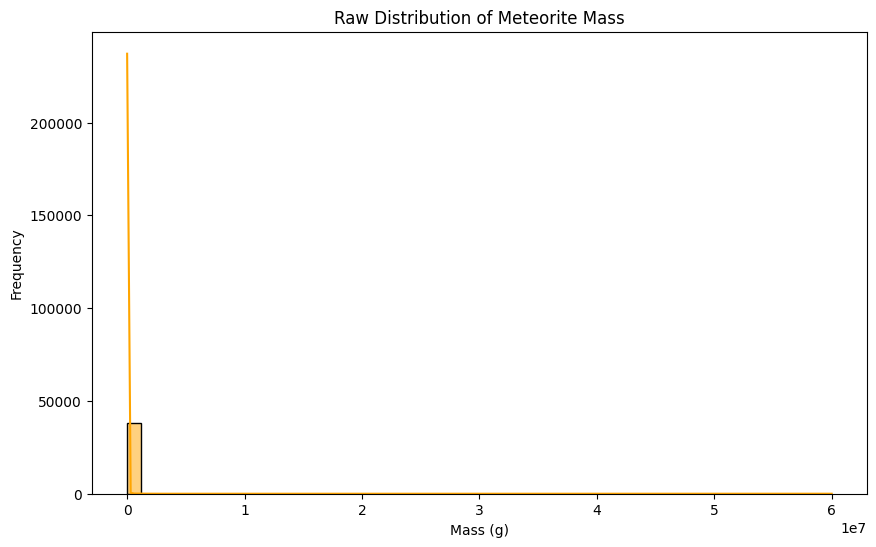

In [168]:
plt.figure(figsize=(10, 6))
sns.histplot(df['mass (g)'], bins=50, kde=True, color='orange')
plt.xlabel('Mass (g)')
plt.ylabel('Frequency')
plt.title('Raw Distribution of Meteorite Mass')
plt.show()


### Log-Transformed Mass Distribution

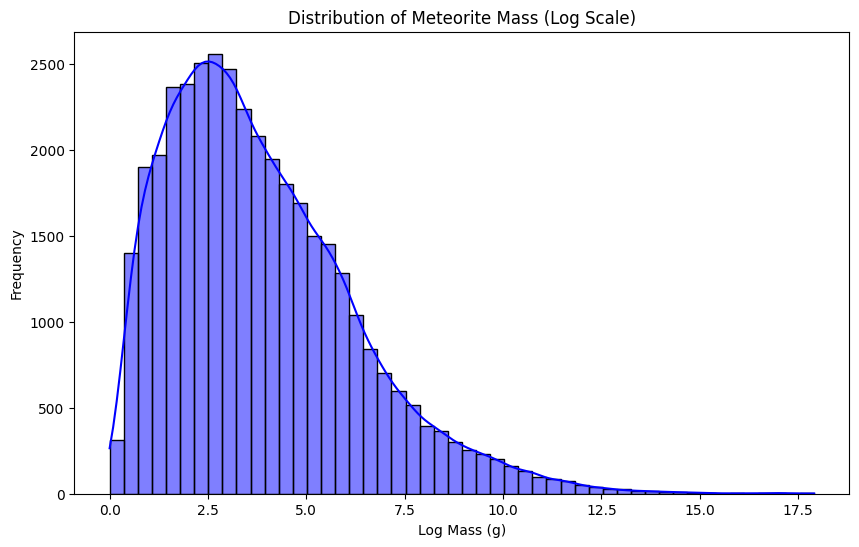

In [169]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['mass (g)']), bins=50, kde=True, color='blue')
plt.xlabel('Log Mass (g)')
plt.ylabel('Frequency')
plt.title('Distribution of Meteorite Mass (Log Scale)')
plt.show()


## Meteorite Discovery Type: Fell vs Found

The `fall` column indicates whether a meteorite was:
- **Fell**: observed falling and recovered
- **Found**: discovered after landing, without a recorded fall event

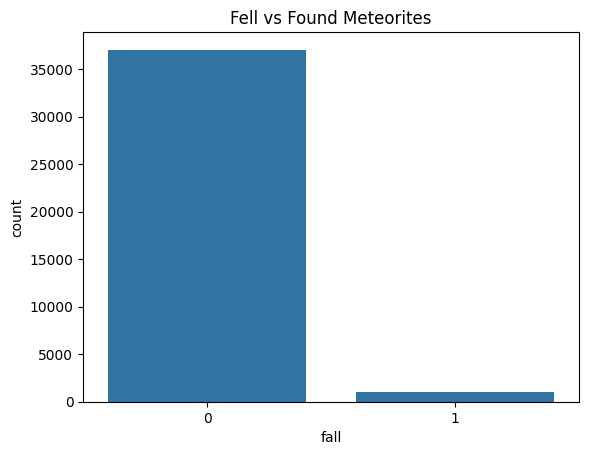

In [170]:
# Count plot for fall status
sns.countplot(x='fall', data=df)
plt.title("Fell vs Found Meteorites")
plt.show()

## Yearly Trend of Meteorite Events

We examine how meteorite events are distributed over the years.

This can reveal:
- Historical trends in discovery
- Possible increases in detection/reporting over time
- Data sparsity or limitations in early years


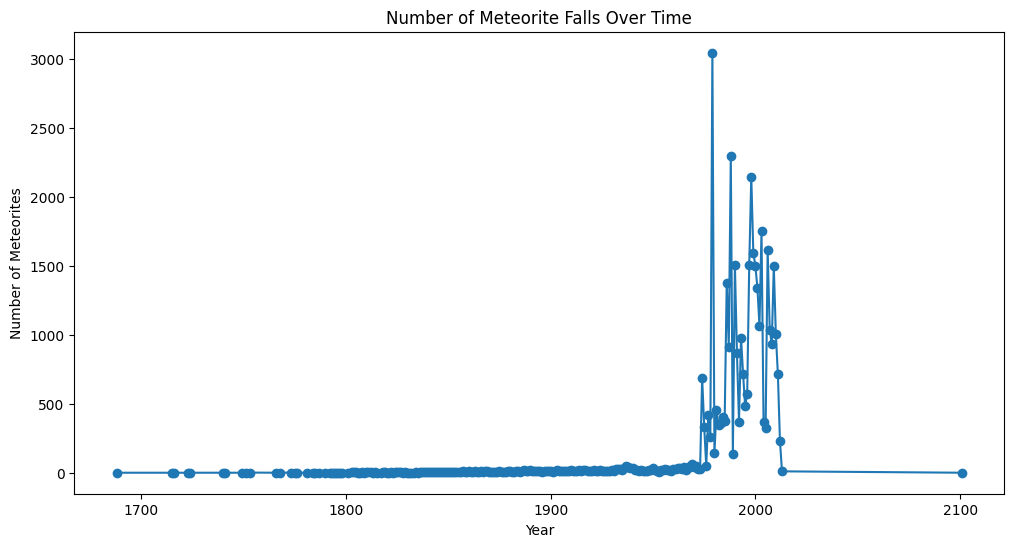

In [171]:
falls_over_time = df.groupby(df['year'].dt.year).size()

plt.figure(figsize=(12, 6))
plt.plot(falls_over_time.index, falls_over_time.values, marker='o')
plt.title('Number of Meteorite Falls Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Meteorites')
# plt.tight_layout()
plt.show()

## Geographic Distribution of Meteorite Landings

To understand where meteorites are most often found or observed, we plot their geographic coordinates using latitude and longitude.

This visualization reveals:
- Regional clusters
- Data sparsity in oceanic or uninhabited areas
- Possible reporting bias (more finds in certain countries)


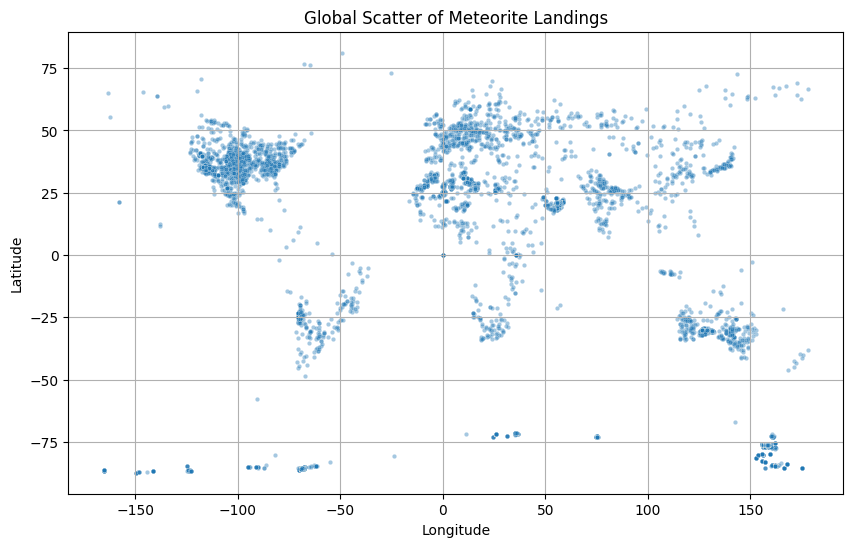

In [172]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='reclong', y='reclat', alpha=0.4, s=10)
plt.title('Global Scatter of Meteorite Landings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


## Interactive World Map of Meteorite Falls and Finds

This map shows the global locations of all recorded meteorite landings.

- Color **yellow (1)** represents observed meteorite **falls**
- Color **dark blue (0)** represents meteorites that were **found** later

In [173]:
import plotly.express as px

fig = px.scatter_geo(
    df,
    lon='reclong',
    lat='reclat',
    color='fall',
    hover_name='name',
    hover_data=['mass (g)', 'recclass'],
    projection='natural earth',
    title='Meteorite Falls vs Found Map'
)

fig.update_geos(
    showcountries=True,
    showland=True,
    landcolor="lightgray",
    showocean=True,
    oceancolor="lightblue"
)
fig.update_layout(height=600, margin={"r": 0, "t": 30, "l": 0, "b": 0})
fig.show()


## Correlation Matrix (Numerical Features)

We examine correlations between key numerical variables such as mass, year, latitude, and longitude.

This helps identify relationships that might influence classification or prediction later.


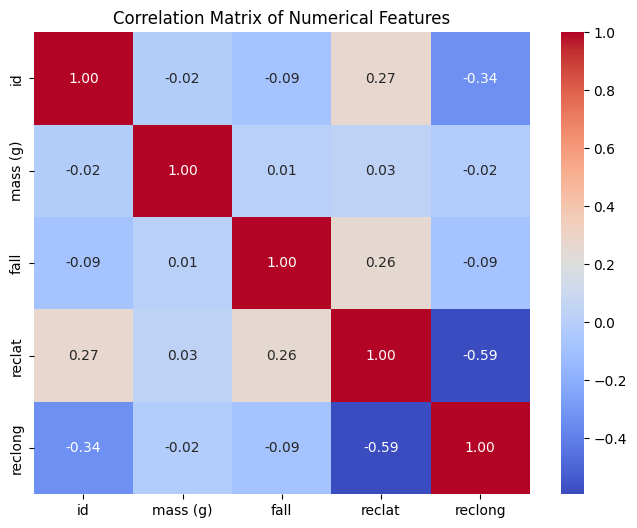

In [174]:
# Select only numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = num_cols.corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


## Box Plot of Meteorite Mass by Fall Type

To understand how mass differs between meteorites that were **found** and those that **fell**, we use two versions of the box plot:

1. **Raw Scale** – Shows the actual mass distribution but is heavily skewed by extreme outliers.
2. **Log Scale** – Applies a logarithmic transformation to the y-axis for better visibility of the core distribution.


### Raw Scale

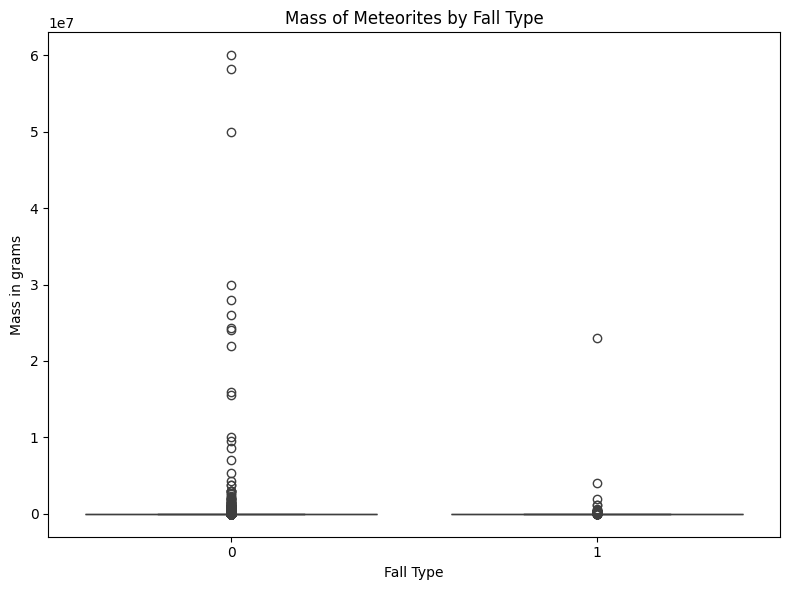

In [175]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fall', y='mass (g)', data=df)
plt.title('Mass of Meteorites by Fall Type')
plt.xlabel('Fall Type')
plt.ylabel('Mass in grams')
plt.tight_layout()
plt.show()


###  Box Plot (Log Scale)

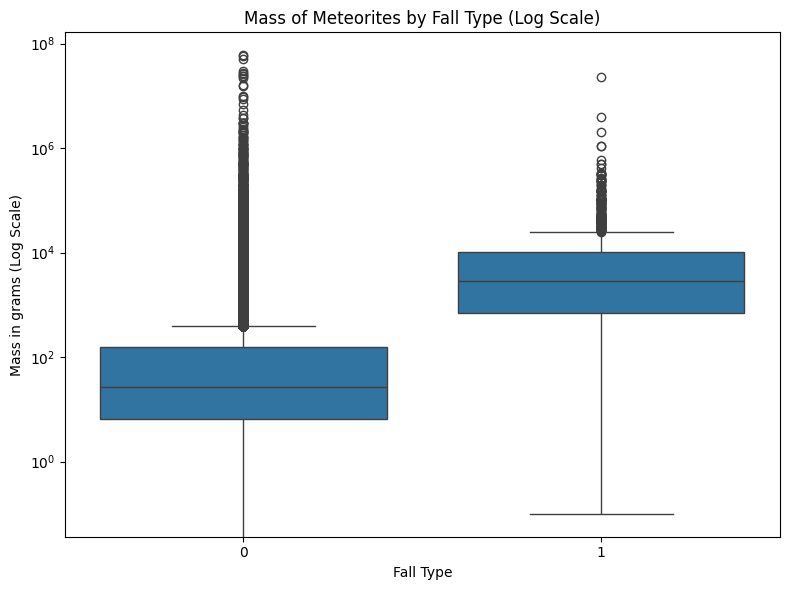

In [176]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fall', y='mass (g)', data=df)
plt.yscale('log')  # Log scale compresses extreme outliers
plt.title('Mass of Meteorites by Fall Type (Log Scale)')
plt.xlabel('Fall Type')
plt.ylabel('Mass in grams (Log Scale)')
plt.tight_layout()
plt.show()


# 6. Research Questions & Analysis



This section answers the four research questions proposed in this project.

The questions are:
1. **What is the distribution of meteorite classifications and how does it differ between observed falls and discovered finds?**
2. **Do high-mass meteorites show distinct classification or geographic patterns?**
3. **Do meteorite falls cluster in specific geographic regions?**
4. **Can we predict whether a meteorite fell or was found using its mass, classification, and location?**


# Q1: What is the distribution of meteorite classifications and how does it differ between observed falls and discovered finds?

This question explores how frequently different meteorite classifications (`recclass`) appear in the dataset and whether they are more likely to be observed falling (`Fell`) or discovered later (`Found`).

### Approach:
- Preprocess the dataset to group `recclass` by `fall` type and compute totals
- Visualize the **Top 20 most common classifications** using stacked bars and `Fell` ratio overlay
- Identify classes most biased toward `Fell` or `Found`
- Use an interactive **treemap** to display rare classifications at a glance


### Preprocess for Classification Fall Counts

In [177]:
# Minimum total occurrences to be included in a class
min_count = 10  

recclass_fall_counts = df.groupby(['recclass', 'fall']).size().reset_index(name='count')
recclass_pivot = recclass_fall_counts.pivot(index='recclass', columns='fall', values='count').fillna(0)
recclass_pivot.columns = ['Found', 'Fell']
recclass_pivot['total'] = recclass_pivot.sum(axis=1)

# Filter out classes less than min_count as the rare classes
recclass_pivot = recclass_pivot[recclass_pivot['total'] >= min_count].sort_values('total', ascending=False)

# Add a normalized metric
recclass_pivot['fell_ratio'] = recclass_pivot['Fell'] / recclass_pivot['total']  
recclass_pivot['found_ratio'] = 1 - recclass_pivot['fell_ratio']


### Top 20 Classifications by Count and Fall Ratio

We visualize the top 20 most frequent meteorite classifications. Each bar is stacked by `Found` and `Fell`, and the red line indicates the proportion of each class that was observed falling.


In [178]:
import plotly.graph_objects as go

top20 = recclass_pivot.head(20).copy()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=top20.index,
    y=top20['Fell'],
    name='Fell',
    marker_color='#ff6b6b',
    hovertemplate='Fell: %{y}<extra></extra>'
))

fig.add_trace(go.Bar(
    x=top20.index,
    y=top20['Found'],
    name='Found',
    marker_color='#4ecdc4',
    hovertemplate='Found: %{y}<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=top20.index,
    y=top20['fell_ratio'],
    mode='lines+markers',
    name='Fell Ratio (Fell/Total)',
    marker=dict(color='red'),
    yaxis='y2',
    hovertemplate='Fell Ratio: %{y:.2f}<extra></extra>'
))

fig.update_layout(
    title='Top 20 Meteorite Classes: Counts vs Fall Ratios',
    xaxis=dict(title='Meteorite Class', tickangle=60),
    yaxis=dict(title='Total Count'),
    yaxis2=dict(
        title='Fell Ratio (Fell/Total)',
        overlaying='y',
        side='right',
        range=[0, 1]
    ),
    barmode='stack',
    legend=dict(orientation="h", yanchor="bottom", y=1.1, xanchor="center", x=0.7),
    height=600
)

fig.show()


### Discovery Bias by Class

Below we list:
- The top 10 classes most biased toward **Fell**
- The top 10 most biased toward **Found**

These outliers may reveal differences in discovery likelihood due to mass, location, or meteorite type.


In [179]:
print("\nClasses Most Biased Toward Falls:")
display(recclass_pivot.sort_values('fell_ratio', ascending=False).head(10)[['Fell','total','fell_ratio']])

print("\nClasses Most Biased Toward Finds:")
display(recclass_pivot.sort_values('found_ratio', ascending=False).head(10)[['Found','total','found_ratio']])



Classes Most Biased Toward Falls:


,Fell,total,fell_ratio
recclass,,,
Stone-uncl,23.0,29.0,0.793103
OC,18.0,69.0,0.260870
Eucrite-cm,5.0,20.0,0.250000
L,10.0,43.0,0.232558
C2-ung,3.0,13.0,0.230769
L/LL5,3.0,13.0,0.230769
Eucrite-mmict,18.0,84.0,0.214286
H,13.0,69.0,0.188406
"Iron, IAB-sHL",3.0,16.0,0.187500



Classes Most Biased Toward Finds:


,Found,total,found_ratio
recclass,,,
CO3,308.0,308.0,1.0
LL5-6,34.0,34.0,1.0
H3.9,36.0,36.0,1.0
LL5/6,39.0,39.0,1.0
H3.6,41.0,41.0,1.0
Eucrite-unbr,29.0,29.0,1.0
LL3,88.0,88.0,1.0
L3.5,84.0,84.0,1.0
CK5,75.0,75.0,1.0


### Interactive Treemap: Rare Meteorite Classifications

This treemap displays all meteorite classifications that occur fewer than 10 times in the dataset. It's useful for showing the **long tail** of rare meteorite types in one view.


In [180]:
import plotly.express as px

rare_classes = recclass_fall_counts[~recclass_fall_counts['recclass'].isin(recclass_pivot.index)]
px.treemap(
    rare_classes,
    path=['recclass'],
    values='count', 
    title='Rare Meteorite Classifications (Total < 10)'
).show()

# Q2: Do meteorites with higher mass exhibit distinct classification patterns or geographic clustering compared to those with lower mass?

This exploratory question investigates how **meteorite mass** relates to:

- **Classification** (`recclass`)
- **Geographic location** (`reclat`, `reclong`)

We aim to determine whether heavier meteorites are associated with specific types or regions, and whether geographic clustering exists based on mass distribution.


## Are heavier meteorites linked to specific classifications?

We use a box plot to compare the distribution of **mass** across the **Top 10 most frequent classifications**.

Since mass spans several magnitudes, we apply a **logarithmic scale** to better visualize differences and detect if heavier meteorites tend to belong to particular `recclass` categories.


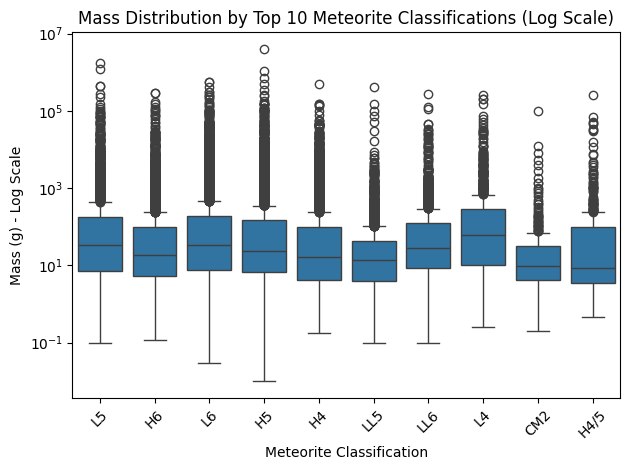

In [181]:
# Get top 10 classes by total count
top10_classes = df['recclass'].value_counts().nlargest(10).index

# Filter data
df_top10_recclass = df[df['recclass'].isin(top10_classes)]

# Plot
sns.boxplot(data=df_top10_recclass, x='recclass', y='mass (g)')
plt.yscale('log')
plt.title('Mass Distribution by Top 10 Meteorite Classifications (Log Scale)')
plt.xlabel('Meteorite Classification')
plt.ylabel('Mass (g) - Log Scale')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Top 10 Meteorite Classes by Average Mass

This bar chart shows the top 10 meteorite classifications (`recclass`) based on **average mass**.


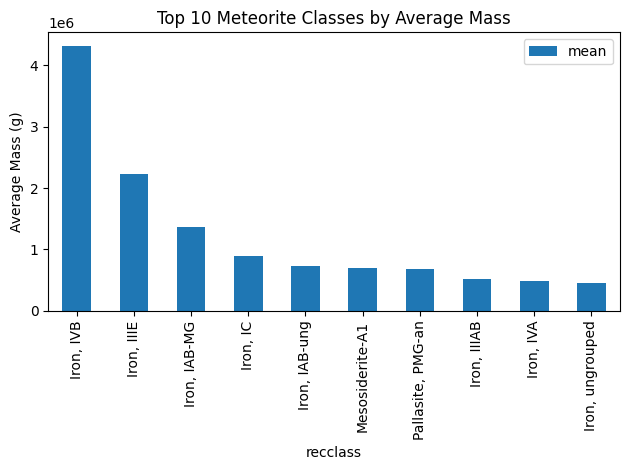

In [182]:
# Group by recclass
class_stats = df.groupby('recclass')['mass (g)'].agg(['count', 'mean', 'median', 'max']).sort_values(by='mean', ascending=False)

# Plot top 10 classes by average mass
class_stats.head(10).plot(kind='bar', y='mean', title='Top 10 Meteorite Classes by Average Mass')
plt.ylabel('Average Mass (g)')
plt.tight_layout()
plt.show()

## Do different meteorite classes tend to fall into specific mass categories?

We create a new column called `mass_category` by binning the `mass (g)` values into four size categories:

- Small: < 500g
- Medium: 500g–1kg
- Large: 1kg–5kg
- Very Large: > 5kg

Then we:
1. Visualize meteorite locations by mass category on an interactive map
2. Compare how `recclass` is distributed across these mass categories


In [183]:
mass_bins = [0, 500, 1000, 5000, df['mass (g)'].max()]
bin_labels = ['Small', 'Medium', 'Large', 'Very Large']

# Create mass category column
df['mass_category'] = pd.cut(df['mass (g)'], bins=mass_bins, labels=bin_labels, include_lowest=True)


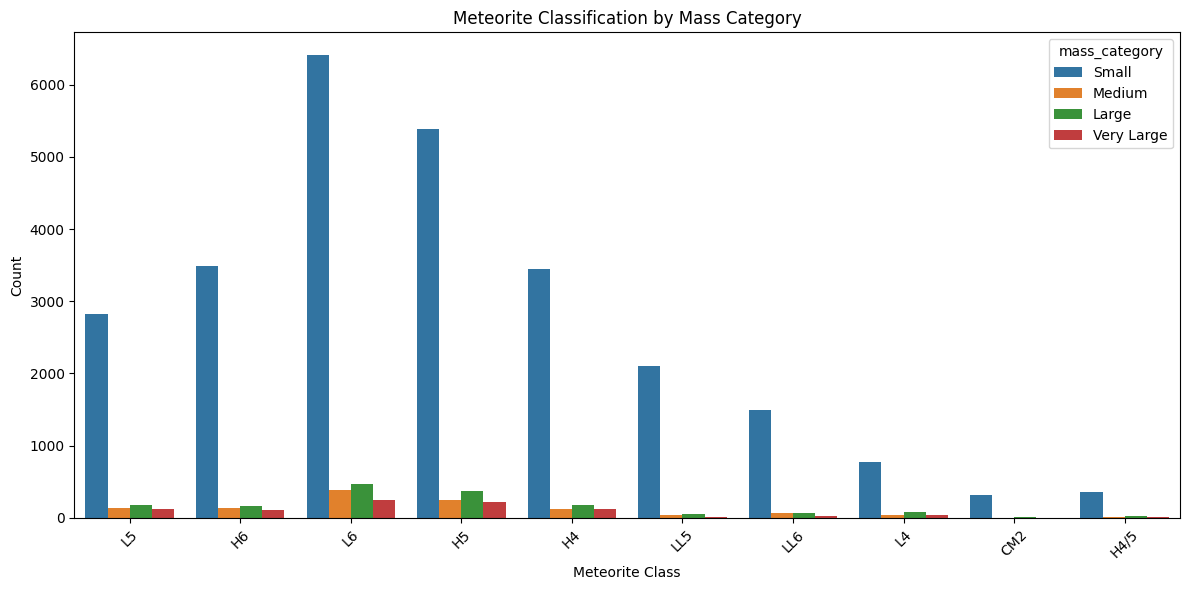

In [184]:
top_classes = df['recclass'].value_counts().nlargest(10).index
df_top = df[df['recclass'].isin(top_classes)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, x='recclass', hue='mass_category')
plt.title('Meteorite Classification by Mass Category')
plt.xlabel('Meteorite Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Do heavier meteorites cluster in specific regions?

Now we check if **geographic location** (latitude and longitude) shows any pattern related to **meteorite mass**.

We use a scatter plot where:
- Each dot = one meteorite
- Color shows mass (log scale to handle extremes)


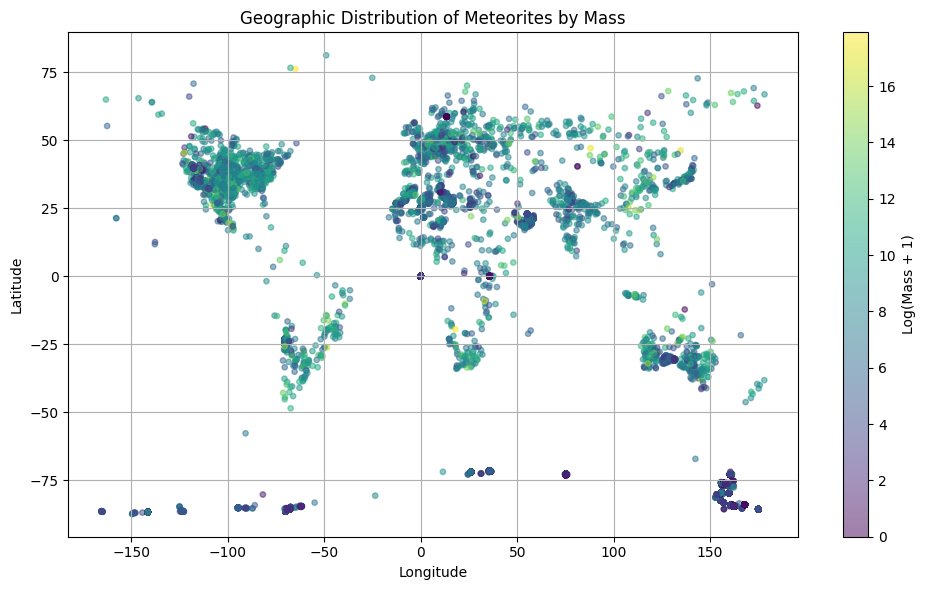

In [185]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['reclong'],
    df['reclat'],
    c=np.log1p(df['mass (g)']),
    cmap='viridis',
    alpha=0.5,
    s=15
)

plt.colorbar(scatter, label='Log(Mass + 1)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Meteorites by Mass')
plt.grid(True)
plt.tight_layout()
plt.show()


## Map of Recent Meteorite Falls (1970–2024)

We use an interactive map to explore **recent meteorite events** based on:

- **Location** (`reclat`, `reclong`)
- **Mass** (bubble size)
- **Year** (color scale)

This helps visualize clusters and identify regions with larger, recent meteorite landings.


In [186]:
import plotly.express as px

# Ensure 'year' is datetime and filter recent events
df['year'] = pd.to_datetime(df['year'], errors='coerce')
df['year_int'] = df['year'].dt.year
df_recent = df[(df['year_int'] > 1970) & (df['year_int'] < 2025)]

fig = px.scatter_mapbox(
    df_recent,
    lat='reclat',
    lon='reclong',
    color='year_int',
    size='mass (g)',
    size_max=15,
    hover_name='name',
    hover_data={'recclass': True, 'mass (g)': True, 'year_int': True},
    mapbox_style='carto-darkmatter',  # default: dark mode style
    zoom=1,
    center={'lat': 0, 'lon': 0},
    title="Meteorite Falls (1970 - 2024) Visualized on Map",
    height=800,
    color_continuous_scale='Viridis'
)

fig.show()


C:\Users\tiagrajah.MYAGR-LPWIN-072\AppData\Local\Temp\ipykernel_24736\2394392785.py:8: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



# Q3: Do meteorite falls cluster in specific geographic regions, and can we predict those clusters?

This question explores whether meteorite landings naturally group in space.

We apply clustering algorithms **KMeans** and **DBSCAN** — on the geographic coordinates (`reclat`, `reclong`) to uncover hidden patterns or natural accumulation zones.


In [187]:
from sklearn.cluster import KMeans

# Drop rows with missing coordinates
df_cluster = df.dropna(subset=['reclat', 'reclong'])


kmeans = KMeans(n_clusters=7, random_state=42)
df_cluster['kmeans_cluster'] = kmeans.fit_predict(df_cluster[['reclat', 'reclong']])


### Global Distribution of Meteorite Locations

This map shows all meteorite fall locations based on latitude and longitude — no clustering applied yet.


In [188]:
fig = px.scatter_mapbox(
    data_frame=df_cluster,
    lat='reclat',
    lon='reclong',
    hover_name='name',
    mapbox_style='carto-darkmatter',
    zoom=1,
    center={'lat': 0, 'lon': 0},
    height=600,
    title="Meteorite Locations"
)
fig.show()


C:\Users\tiagrajah.MYAGR-LPWIN-072\AppData\Local\Temp\ipykernel_24736\3304345829.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



### KMeans Clustering on Map (Interactive)

This interactive map displays the clusters generated by KMeans, colored by cluster ID.


In [189]:
fig = px.scatter_mapbox(
    df_cluster,
    lat='reclat',
    lon='reclong',
    color='kmeans_cluster',
    hover_name='name',
    mapbox_style='carto-darkmatter',
    zoom=1,
    center={'lat': 0, 'lon': 0},
    height=700,
    title="KMeans Clustering of Meteorite Locations"
)
fig.show()


C:\Users\tiagrajah.MYAGR-LPWIN-072\AppData\Local\Temp\ipykernel_24736\2805342539.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



### KMeans Clustering using Seaborn (Static)

This plot presents the same clusters using a static scatter plot.


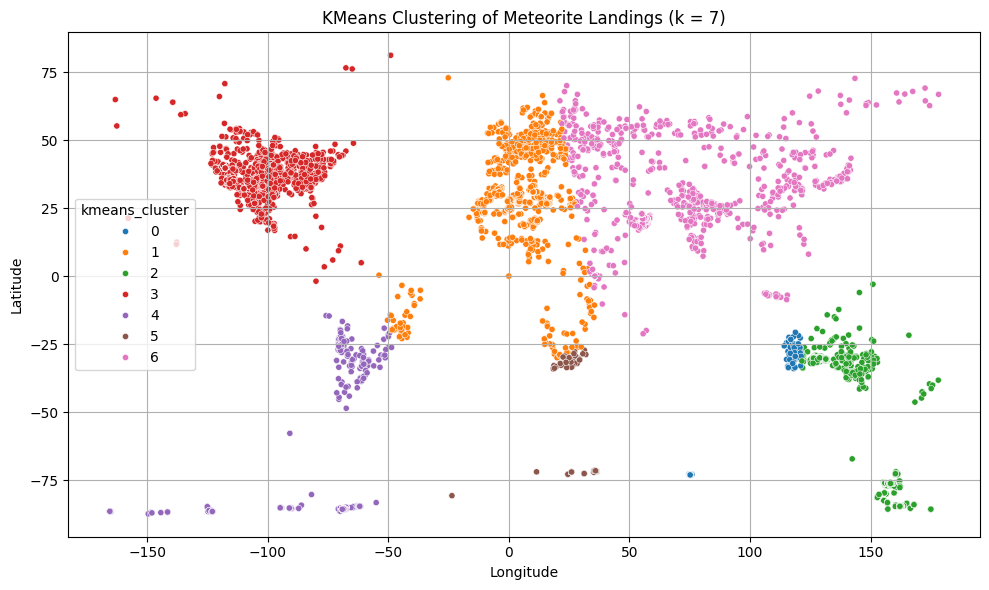

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='reclong', y='reclat', hue='kmeans_cluster', palette='tab10', s=20)
plt.title('KMeans Clustering of Meteorite Landings (k = 7)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()


### DBSCAN Clustering of Meteorite Locations

Unlike KMeans, which requires a fixed number of clusters, **DBSCAN** (Density-Based Spatial Clustering) automatically detects clusters based on data density and can mark noise (outliers).

It’s well-suited for **geographic data** where natural groupings vary in shape and density.


In [191]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Prepare coordinates
coords = df_cluster[['reclat', 'reclong']].values

# Normalize (important for DBSCAN distance)
coords_scaled = StandardScaler().fit_transform(coords)

# Apply DBSCAN
db = DBSCAN(eps=0.3, min_samples=10)
df_cluster['dbscan_cluster'] = db.fit_predict(coords_scaled)


- `eps`: the radius around a point to consider neighbors
- `min_samples`: the minimum number of points to form a dense region
- Cluster label `-1` = noise (outliers)

We now visualize the clusters.


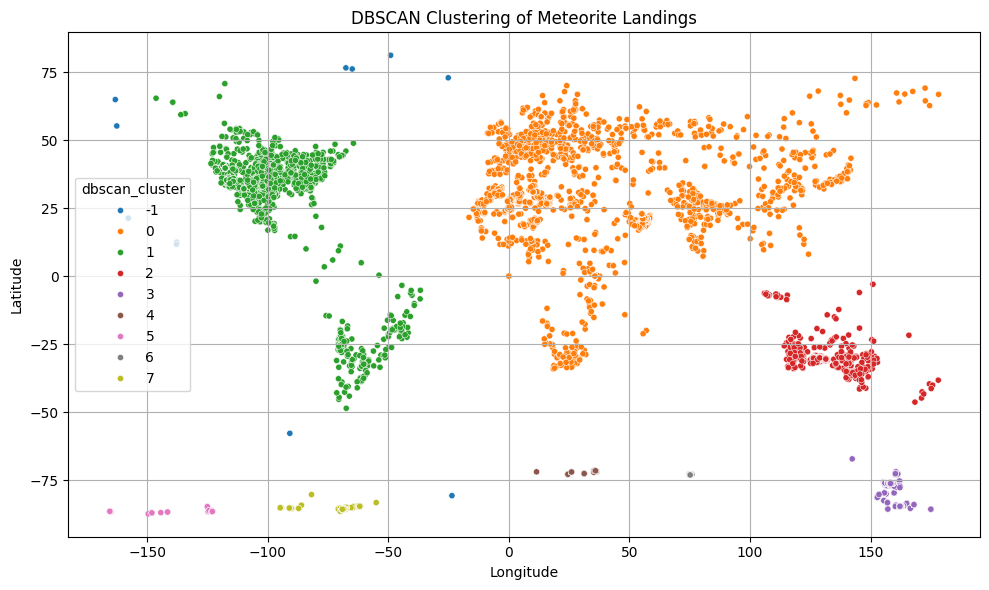

In [192]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cluster,
    x='reclong',
    y='reclat',
    hue='dbscan_cluster',
    palette='tab10',
    s=20,
    legend='full'
)
plt.title('DBSCAN Clustering of Meteorite Landings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()


### Predicting Meteorite Cluster Using Classification

As an extension to KMeans clustering, we trained a **Random Forest classifier** to predict the cluster ID based on `mass`, `reclat`, and `reclong`.

This demonstrates whether the spatial and physical attributes can reliably determine which cluster a meteorite belongs to.


Accuracy: 0.9986881805063623
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       511
           1       1.00      0.99      1.00      1821
           2       1.00      1.00      1.00      2501
           3       1.00      1.00      1.00       364
           4       1.00      1.00      1.00       354
           5       1.00      1.00      1.00      1287
           6       0.99      1.00      0.99       785

    accuracy                           1.00      7623
   macro avg       1.00      1.00      1.00      7623
weighted avg       1.00      1.00      1.00      7623



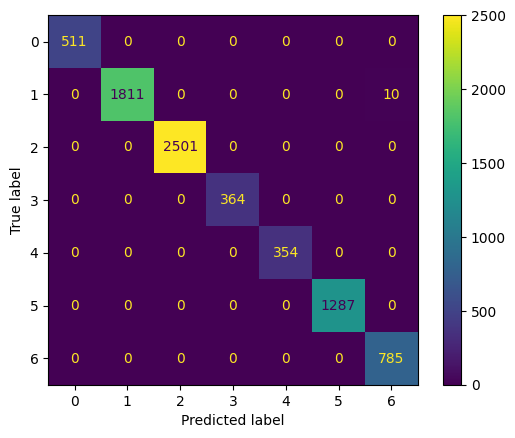

In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Features and labels
features = df_cluster[['reclat', 'reclong', 'mass (g)']].fillna(0)
labels = df_cluster['kmeans_cluster']  # ✅ Not 'df_cluster'

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, stratify=labels, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Q4: Can we predict whether a meteorite was 'Fell' or 'Found' using its physical and geographic features?

This question is **predictive**. We build machine learning models to classify meteorites as either:

- **Fell** = 1 (observed falling)
- **Found** = 0 (discovered later)

### 🎯 Features Used:
- `mass (g)`
- `recclass` (classification)
- `reclat`, `reclong` (geographic coordinates)

We use:
- Logistic Regression
- Random Forest
- MLP Classifier (neural net)

Each model is evaluated using accuracy, confusion matrix, and classification report.


### Machine Learning Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,classification_report
from sklearn.svm import SVC

# Drop irrelevant columns
df = df[['mass (g)', 'recclass', 'reclat', 'reclong', 'fall']].dropna()

# Encode categorical feature
df['recclass'] = LabelEncoder().fit_transform(df['recclass'])

# Features and target
X = df[['mass (g)', 'recclass', 'reclat', 'reclong']]
y = df['fall']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Logistic Regression

In [ ]:
# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict
lr_pred = lr_model.predict(X_test_scaled)

# Save classification report
lr_report = classification_report(y_test, lr_pred, target_names=["Found", "Fell"], output_dict=True)

# Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_pred)
lr_cm_df = pd.DataFrame(lr_cm, index=['Actual: Found (0)', 'Actual: Fell (1)'],
                                   columns=['Predicted: Found (0)', 'Predicted: Fell (1)'])

# Print results
print("📘 Logistic Regression Confusion Matrix:")
print(lr_cm_df)
print("\n📊 Classification Report:")
print(classification_report(y_test, lr_pred, target_names=["Found", "Fell"]))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Predict
rf_pred = rf_model.predict(X_test_scaled)

# Save classification report for later comparison
rf_report = classification_report(y_test, rf_pred, target_names=["Found", "Fell"], output_dict=True)

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)
rf_cm_df = pd.DataFrame(rf_cm, index=['Actual: Found (0)', 'Actual: Fell (1)'],
                                  columns=['Predicted: Found (0)', 'Predicted: Fell (1)'])

# Print results
print("🌳 Random Forest Confusion Matrix:")
print(rf_cm_df)
print("\n📊 Classification Report:")
print(classification_report(y_test, rf_pred, target_names=["Found", "Fell"]))


### SVM

In [ ]:
# Train SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict
svm_pred = svm_model.predict(X_test_scaled)

# Save classification report
svm_report = classification_report(y_test, svm_pred, target_names=["Found", "Fell"], output_dict=True)

# Confusion Matrix
svm_cm = confusion_matrix(y_test, svm_pred)
svm_cm_df = pd.DataFrame(svm_cm, index=['Actual: Found (0)', 'Actual: Fell (1)'],
                                     columns=['Predicted: Found (0)', 'Predicted: Fell (1)'])

# Print results
print("🔲 SVM Confusion Matrix:")
print(svm_cm_df)
print("\n📊 Classification Report:")
print(classification_report(y_test, svm_pred, target_names=["Found", "Fell"]))

### Visual Comparison of Confusion Matrices

Below are the confusion matrices for the three models. Logistic Regression, Random Forest, and SVM. These matrices visually represent how well each model performed in classifying the meteorites as "Found" or "Fell".

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Logistic Regression
sns.heatmap(lr_cm_df, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Random Forest
sns.heatmap(rf_cm_df, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("")

# SVM
sns.heatmap(svm_cm_df, annot=True, fmt='d', cmap='Purples', ax=axes[2])
axes[2].set_title("SVM")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [lr_report['accuracy'], rf_report['accuracy'], svm_report['accuracy']],
    "Precision (Fell)": [lr_report['Fell']['precision'], rf_report['Fell']['precision'], svm_report['Fell']['precision']],
    "Recall (Fell)": [lr_report['Fell']['recall'], rf_report['Fell']['recall'], svm_report['Fell']['recall']],
    "F1-Score (Fell)": [lr_report['Fell']['f1-score'], rf_report['Fell']['f1-score'], svm_report['Fell']['f1-score']]
})

comparison_df.set_index("Model", inplace=True)
comparison_df = comparison_df.round(3)
display(comparison_df)

### Interpretation:

- **Logistic Regression** shows high overall accuracy but fails to capture "Fell" cases — very low recall and F1-score.
- **SVM** improves on logistic regression but still underperforms in recall for the "Fell" class.
- **Random Forest** clearly outperforms the others in all metrics related to the minority class ("Fell").

---

### Final Verdict:
**Random Forest Classifier** is the best model for this classification task. It balances precision and recall effectively, especially for the underrepresented class, and delivers the most robust results.
